In [1]:
import pandas as pd
import statsmodels.stats.multitest as multi

from CosinorPy import file_parser, cosinor, cosinor1
from CosinorPy.helpers import df_add_row

In [2]:
accidents = pd.read_csv("../PrometneNesreče.csv")

C:\Users\Hana\AppData\Local\Temp\ipykernel_51248\901670543.py:1: DtypeWarning: Columns (31,32,33,34,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  accidents = pd.read_csv("../PrometneNesreče.csv")


In [3]:
# Priprava podatkov
accidents['NastanekDatumCas'] = pd.to_datetime(accidents['NastanekDatumCas'], format='ISO8601', errors='coerce')
print(f"NastanekDatumCas column dtype: {accidents['NastanekDatumCas'].dtype}")

NastanekDatumCas column dtype: datetime64[ns]


# CosinorPy - zima

In [5]:
winter_mask = accidents['NastanekDatumCas'].dt.month.isin([12, 1, 2])

winter_accidents = accidents[winter_mask]
# print(f"NastanekDatumCas column dtype: {winter_accidents['NastanekDatumCas'].dtype}")

hours = winter_accidents['NastanekDatumCas'].dt.hour

accidents_per_hour = hours.value_counts()
accidents_per_hour = accidents_per_hour.sort_index()

# Ustvari pandas dataframe v formatu, ki bo primeren za uporabo CosinorPy
df_plot = pd.DataFrame({
    "test": "HourlyAccidentsWinter",  # konstantna oznaka vseh vrstic
    "x": accidents_per_hour.index,  # Ura (od 0 do 23)
    "y": accidents_per_hour.values  # Število nesreč za tisto uro
})

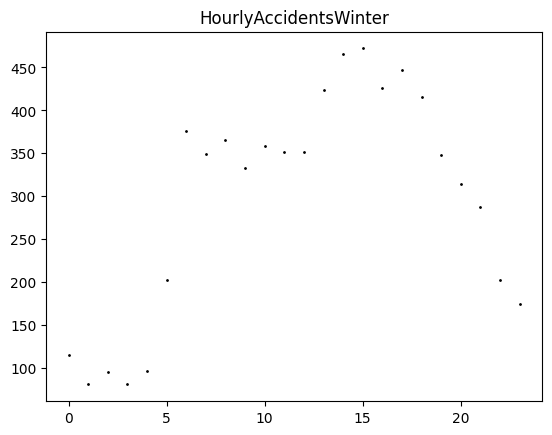

In [6]:
cosinor.plot_data(df_plot, names=["HourlyAccidentsWinter"])

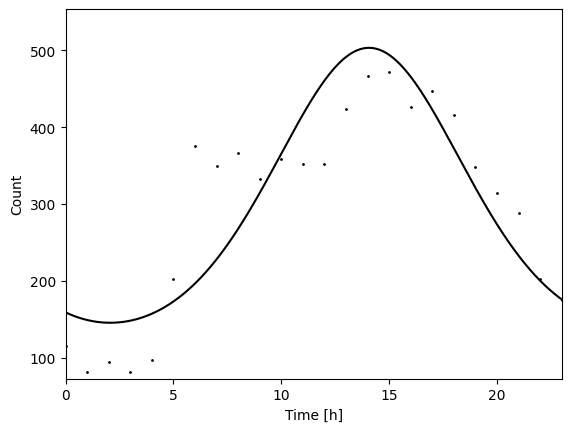

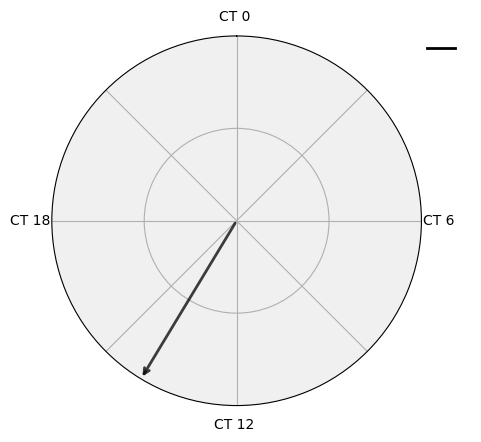

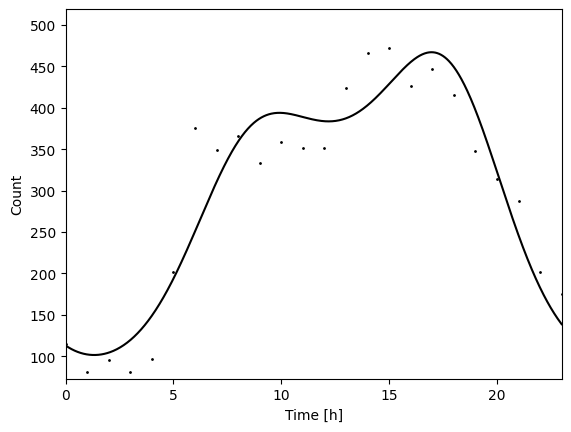

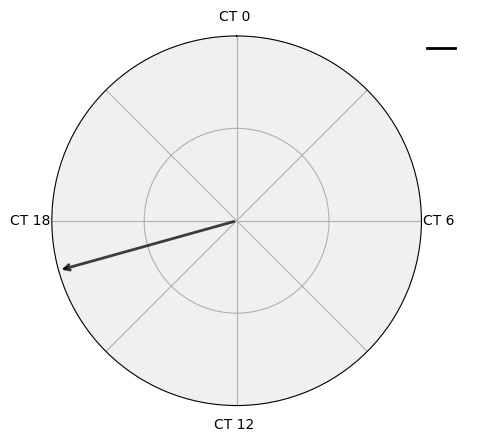

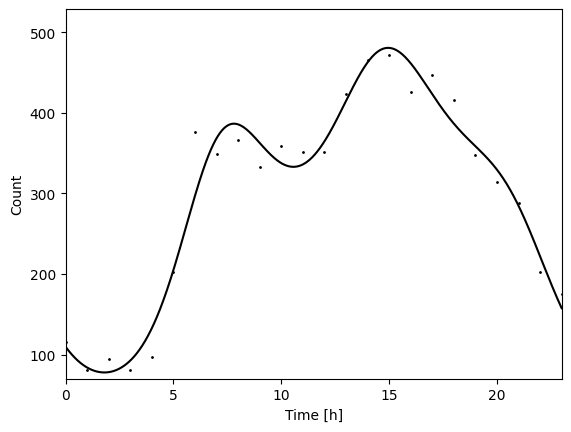

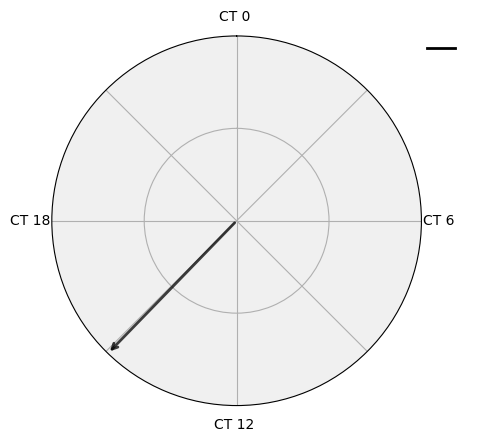

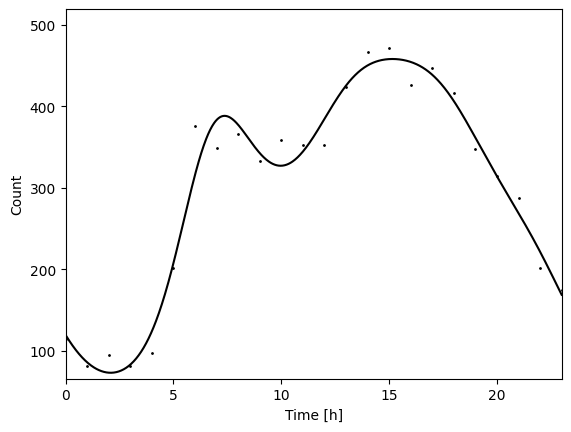

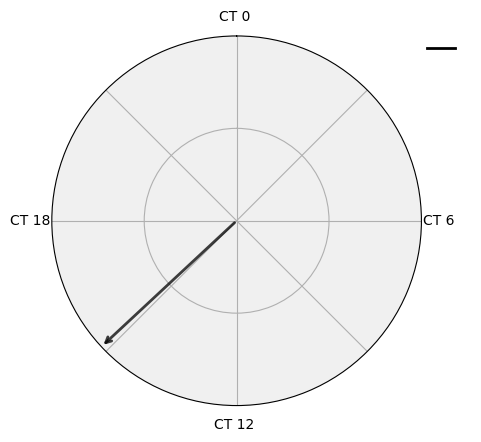

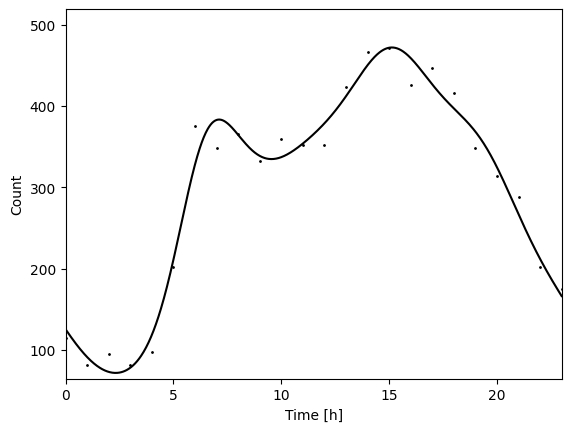

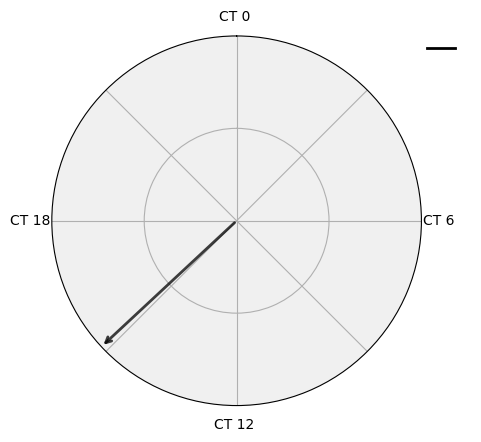

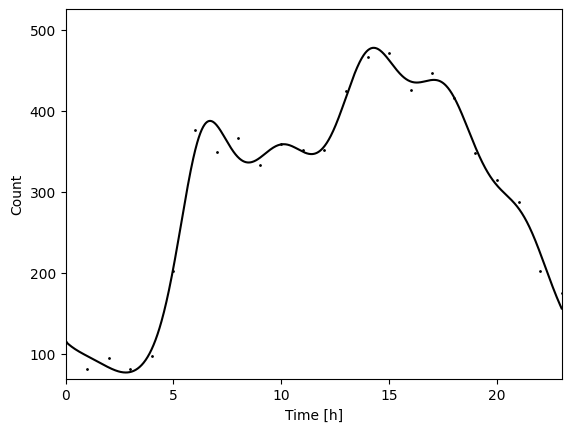

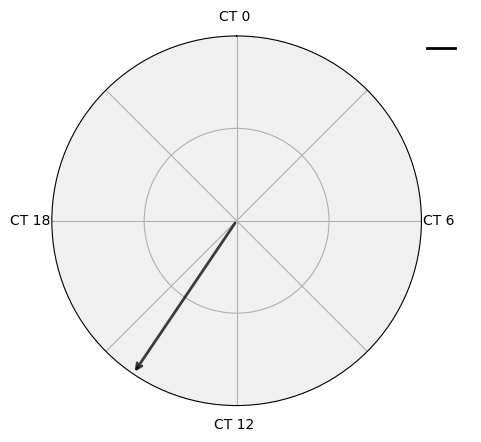

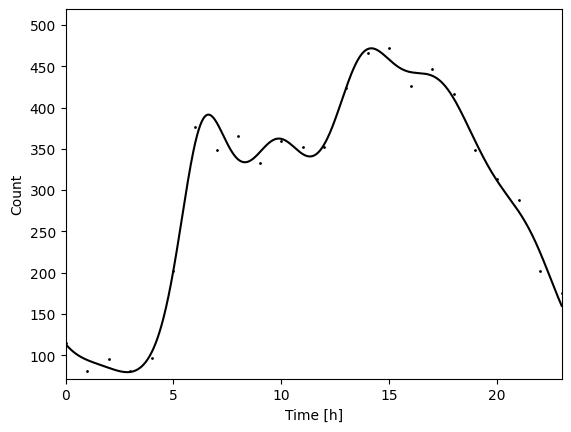

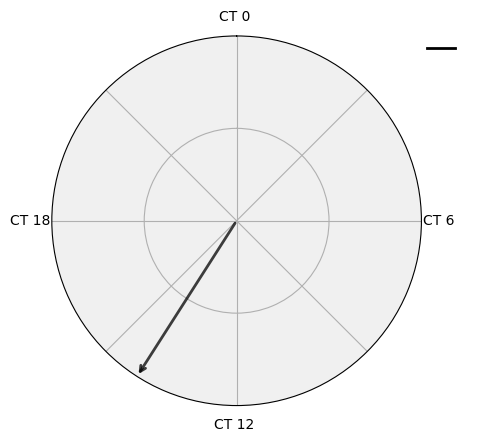

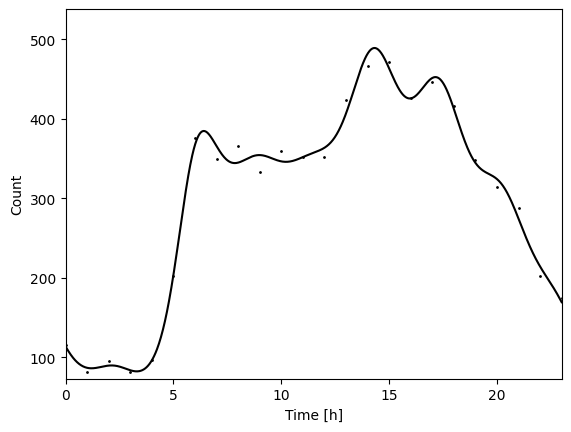

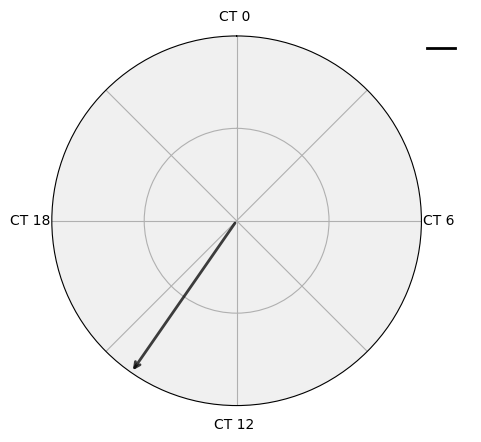

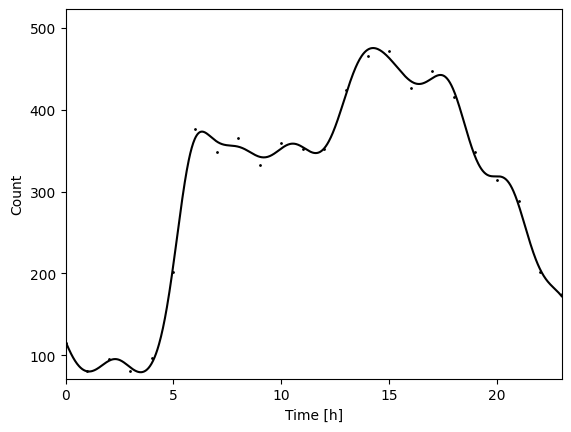

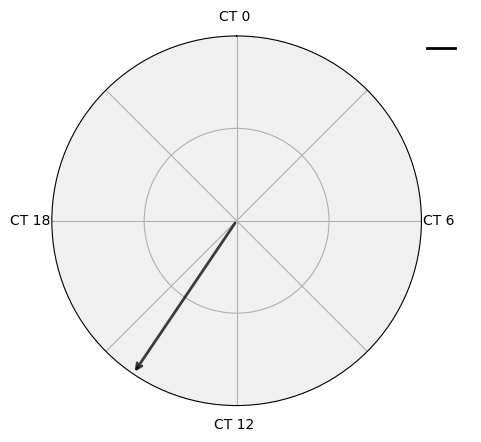

c:\Users\Hana\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


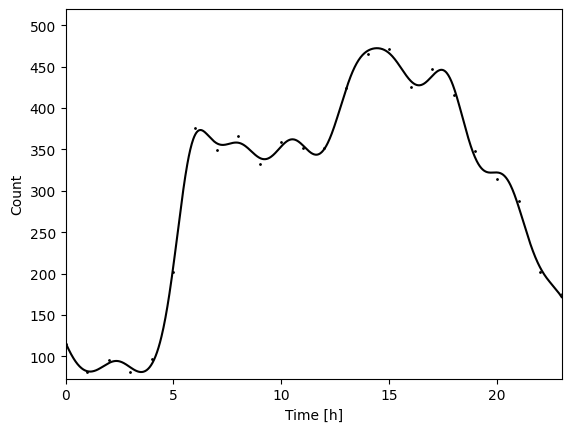

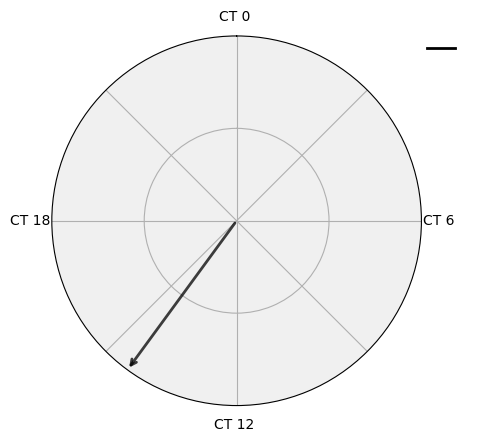

In [7]:
X = df_plot.x.to_numpy()
Y = df_plot.y.to_numpy()

df_results = pd.DataFrame(columns=[
    'test', 'period', 'n_components', 'p', 'q', 'RSS', 
    'log-likelihood', 'prsquared', 'amplitude', 'acrophase', 
    'mesor', 'peaks', 'heights', 'troughs', 'heights2'
], dtype=float)


numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in numbers:
    results, statistics, rhythm_param, _, _ = cosinor.fit_me(X, Y, n_components = i, period = 24, model_type = 'gen_poisson', plot_margins=False)
    #result_table.append(result)

    # print("Statistics:", statistics.keys())
    # print("Rhythm parameters:", rhythm_param.keys())
    # print("Results attributes:", dir(results))

    df_results = df_add_row(df_results, {
        'test': 'HourlyAccidentsWinter', 
        'period': 24,
        'n_components': i,
        'p': statistics['p'], 
        'RSS': statistics['RSS'],
        'log-likelihood': results.llf,        
        'prsquared': results.prsquared,  # Alternative to R²
        'amplitude': rhythm_param['amplitude'],
        'acrophase': rhythm_param['acrophase'],
        'mesor': rhythm_param['mesor'],
        'peaks': rhythm_param['peaks'],
        'heights': rhythm_param['heights'],
        'troughs': rhythm_param['troughs'],
        'heights2': rhythm_param['heights2']
    })


df_results.q = multi.multipletests(df_results.p, method = 'fdr_bh')[1]

In [8]:
display(df_results)

,test,period,n_components,p,q,RSS,log-likelihood,prsquared,amplitude,acrophase,mesor,peaks,heights,troughs,heights2
0,HourlyAccidentsWinter,24.0,1.0,3.867510e-09,3.867510e-09,106630.267542,-134.772350,0.125667,178.719170,2.597553,324.381713,[14.078078078078079],[503.10088264435535],[2.066066066066066],[145.6625432460358]
1,HourlyAccidentsWinter,24.0,2.0,1.326888e-12,1.474320e-12,44000.272520,-123.335106,0.199866,182.807664,1.842816,284.352483,"[9.897897897897899, 16.96096096096096]","[393.97283593120693, 467.16014718660944]",[1.3453453453453452],[101.54811108801397]
2,HourlyAccidentsWinter,24.0,3.0,9.444666e-17,1.349238e-16,14392.922521,-110.332262,0.284221,201.479213,2.371132,279.222761,"[7.783783783783783, 14.942942942942944]","[386.55698789603986, 480.7019742236963]",[1.7777777777777777],[77.74640700152106]
3,HourlyAccidentsWinter,24.0,4.0,6.002779e-17,1.000463e-16,10797.128836,-106.956494,0.306122,192.461855,2.320816,265.554895,"[7.351351351351351, 15.135135135135135]","[388.2675024726038, 458.0153833270152]",[2.066066066066066],[73.09855455273926]
4,HourlyAccidentsWinter,24.0,5.0,1.581045e-16,1.976306e-16,9316.337920,-105.299774,0.316870,200.332817,2.320816,271.832831,"[7.111111111111111, 15.135135135135135]","[383.4382934183272, 472.16564781888735]",[2.3063063063063063],[71.50001475730836]
5,HourlyAccidentsWinter,24.0,6.0,1.286642e-18,3.216606e-18,4371.144355,-97.457897,0.367744,200.556583,2.547237,277.325551,"[6.678678678678678, 10.09009009009009, 14.2702...","[387.58059021673824, 358.79025598368054, 477.8...",[2.7867867867867866],[76.76896836693247]
6,HourlyAccidentsWinter,24.0,7.0,5.411459e-18,1.082292e-17,4548.247397,-96.534385,0.373735,196.121066,2.572395,275.623788,"[6.63063063063063, 9.897897897897899, 14.17417...","[391.4142029907058, 362.428775018267, 471.7448...",[2.834834834834835],[79.5069906737199]
7,HourlyAccidentsWinter,24.0,8.0,3.303510e-20,1.101170e-19,2752.545539,-88.400613,0.426503,203.514320,2.534658,285.666539,"[6.39039039039039, 8.984984984984985, 14.31831...","[384.6957355239879, 354.38850001200484, 489.18...","[1.2012012012012012, 3.315315315315315]","[86.03033654912312, 82.15926228590887]"
8,HourlyAccidentsWinter,24.0,9.0,4.670053e-23,4.670053e-22,1147.332878,-78.623965,0.489928,198.073031,2.547237,277.370427,"[6.342342342342342, 10.522522522522522, 14.270...","[373.2965359531675, 358.6154105926376, 475.441...","[1.105105105105105, 3.4594594594594597]","[80.20461368191694, 79.31075698808031]"
9,HourlyAccidentsWinter,24.0,10.0,1.127584e-22,5.637919e-22,898.103220,-77.197675,0.499181,195.817778,2.509500,276.656420,"[6.246246246246246, 7.87987987987988, 10.52252...","[373.52423093208466, 358.36191714718495, 362.2...","[1.1531531531531531, 3.5075075075075075]","[81.39845902846028, 80.83864181894221]"


### Katero je najboljše število komponent

In [9]:
df_best_model = cosinor.get_best_models(df_plot, df_results, n_components = [1,2,3,4,5,6,7,8,9,10])
df_best_model

,test,period,n_components,p,q,RSS,log-likelihood,prsquared,amplitude,acrophase,mesor,peaks,heights,troughs,heights2
0,HourlyAccidentsWinter,24.0,6.0,1.286642e-18,3.216606e-18,4371.144355,-97.457897,0.367744,200.556583,2.547237,277.325551,"[6.678678678678678, 10.09009009009009, 14.2702...","[387.58059021673824, 358.79025598368054, 477.8...",[2.7867867867867866],[76.76896836693247]


c:\Users\Hana\AppData\Local\Programs\Python\Python312\Lib\site-packages\CosinorPy\cosinor.py:1659: RuntimeWarning: invalid value encountered in scalar divide
  F = (SSLOF/(n_T-1-2*n_components))/(SSPE/(N-n_T))


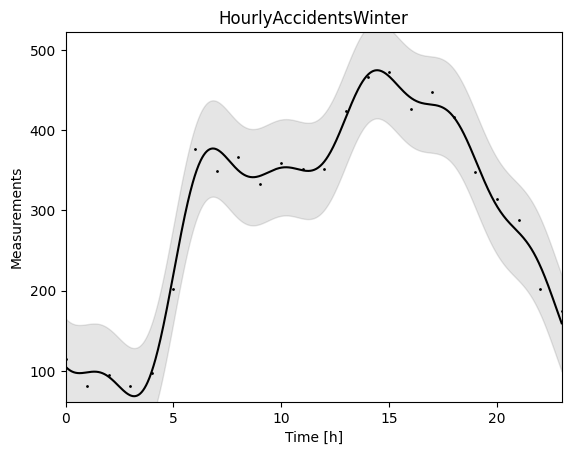

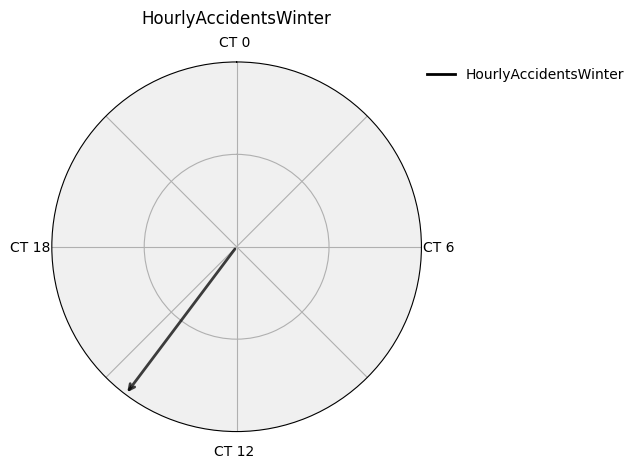

In [10]:
cosinor.plot_df_models(df_plot, df_best_model)